In [1]:
from sklearn.datasets import make_circles, make_moons, make_blobs
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from cvxopt import matrix
from cvxopt import solvers
from numpy import linalg as LA

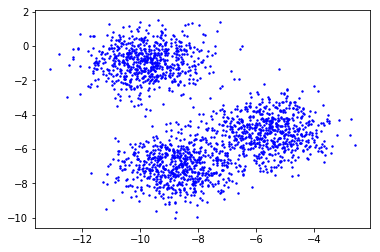

In [2]:
X, y = make_blobs(n_samples=2000, centers=3)
plt.scatter(X[:, 0], X[:, 1], c="blue", s=2)
y[y == 0] = -1

In [3]:
def gaussian_pdf(x, mu, delta):
    n = x.shape[0]
    return np.exp(-1/2 * np.dot(np.dot((x-mu).T, np.linalg.inv(delta)), x-mu)) / ((2*np.pi)**(n/2) * np.linalg.det(delta)**(1/2))

In [4]:
def likelihood(X, centers, deltas, priors):
    l = 0
    for x in X:
        p = 0
        for i in range(centers.shape[0]):
            p += gaussian_pdf(x, centers[i], deltas[i]) * priors[i]
        l += np.log(p)
    return l

In [5]:
class gmm:
    def __init__(self, d, clusters):
        self.d = d
        self.clusters = clusters

    def fit(self, X, max_iter=100):
        centers = []
        deltas = []
        priors = []

        for i in range(self.clusters):
            centers.append(np.random.uniform(low=-10, high=10, size=(self.d)))
            deltas.append(np.eye(self.d) * np.random.random_sample())
            priors.append(np.random.random_sample(1))
        centers = np.array(centers)
        deltas = np.array(deltas)
        priors = np.array(priors)

        for it in range(max_iter):
            # E step
            if it % (max_iter/10) == 0:
                print(likelihood(X, centers, deltas, priors))
            w = []
            for x in X:
                pdf = []
                for i in range(len(centers)):
                    pdf.append(gaussian_pdf(x, centers[i], deltas[i]) * priors[i])
                w.append(np.array(pdf).reshape(len(pdf)))
            w = np.array(w)
            w = np.divide(w, np.sum(w, axis=-1).reshape(w.shape[0], 1))

            # M step
            priors = np.sum(w, axis=0) / w.shape[0]
            mus = []
            dels = []
            for i in range(self.clusters):
                mu = np.sum(np.multiply(w[:, i].reshape(w.shape[0], 1), X), axis=0) / np.sum(w[:, i])
                mus.append(mu)
                delta = np.zeros((self.d, self.d))
                for j in range(X.shape[0]):
                    delta += np.multiply(w[j, i], np.outer(X[j]-centers[i], X[j]-centers[i])) / np.sum(w[:, i])
                dels.append(delta)
            centers = np.array(mus)
            deltas = np.array(dels)
        
        self.centers = centers
        self.deltas = deltas
        self.priors = priors
        
    def plot_centers(self):
        plt.scatter(self.centers[:, 0], self.centers[:, 1], c="blue", s=10)
        
    def visualize_contours(self):
        for i in range(self.clusters):
            x = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
            y = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
            density = np.zeros((len(x), len(y)))
            for (xpos, xidx) in zip(x, range(len(x))):
                for (ypos, yidx) in zip(y, range(len(y))):
                    pos = np.array([xpos, ypos])
                    density[yidx, xidx] = gaussian_pdf(pos, self.centers[i], self.deltas[i])

            Xd, Yd = np.meshgrid(x, y)
            step = 0.01
            m = np.amax(density)
            levels = np.arange(0.0, m, step) + step
            plt.contour(x, y, density, levels, cmap='cool', alpha=0.5)
        plt.colorbar()

In [6]:
g = gmm(2, 3)

In [7]:
g.fit(X, max_iter=200)

[-43046.31188411]
-7771.66454767607
-7743.16963609979
-7743.163186462671
-7743.163185687346
-7743.163185687263
-7743.163185687242
-7743.163185687254
-7743.163185687253
-7743.163185687255


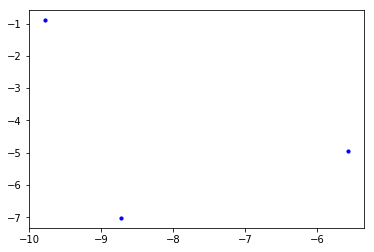

In [8]:
g.plot_centers()

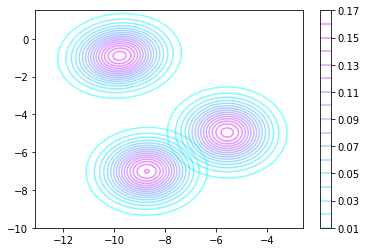

In [9]:
g.visualize_contours()